## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

/Users/hahaha/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(input_layer)
        else:
            x = keras.layers.Dense(units = n_units, activation = 'relu')(x)
            
    out = keras.layers.Dense(units = output_units, activation = 'softmax')(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 15 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""

reduce_lr_factor = [0.2, 0.5, 0.8]
reduce_lr_patience = [5, 10, 15]

In [9]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patience) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, reduce_lr_patience)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patience: %i" % (i, reduce_factor, reduce_patience))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor = reduce_factor, min_lr = 1e-12, monitor = 'val_loss', patience = reduce_patience, verbose = 1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patience: 5
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15

Epoch 4/15
50000/50000 [==============================] - 3s 63us/step - loss: 1.9642 - accuracy: 0.3002 - val_loss: 1.9331 - val_accuracy: 0.3157
Epoch 5/15
50000/50000 [==============================] - 3s 62us/step - loss: 1.9085 - accuracy: 0.3260 - val_loss: 1.8877 - val_accuracy: 0.3338
Epoch 6/15
50000/50000 [==============================] - 3s 62us/step - loss: 1.8685 - accuracy: 0.3428 - val_loss: 1.8547 - val_accuracy: 0.3517
Epoch 7/15
50000/50000 [==============================] - 3s 62us/step - loss: 1.8376 - accuracy: 0.3566 - val_loss: 1.8281 - val_accuracy: 0.3605
Epoch 8/15
50000/50000 [==============================] - 3s 62us/step - loss: 1.8125 - accuracy: 0.3660 - val_loss: 1.8074 - val_accuracy: 0.3680
Epoch 9/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.7894 - accuracy: 0.3726 - val_loss: 1.7827 - val_accuracy: 0.3781
Epoch 10/15
50000/50000 [==============================] - 3s 60us/step - loss: 1.7684 - accuracy: 0.3795 - val_loss: 

50000/50000 [==============================] - 3s 66us/step - loss: 1.6775 - accuracy: 0.4116 - val_loss: 1.6743 - val_accuracy: 0.4133
Epoch 15/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.6636 - accuracy: 0.4168 - val_loss: 1.6612 - val_accuracy: 0.4169
Numbers of exp: 5, reduce_factor: 0.50, reduce_patience: 15
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_____________________________________________

Epoch 2/15
50000/50000 [==============================] - 3s 65us/step - loss: 2.1009 - accuracy: 0.2411 - val_loss: 2.0347 - val_accuracy: 0.2660
Epoch 3/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.9902 - accuracy: 0.2903 - val_loss: 1.9507 - val_accuracy: 0.3085
Epoch 4/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.9197 - accuracy: 0.3248 - val_loss: 1.8954 - val_accuracy: 0.3378
Epoch 5/15
50000/50000 [==============================] - 3s 67us/step - loss: 1.8733 - accuracy: 0.3453 - val_loss: 1.8574 - val_accuracy: 0.3541
Epoch 6/15
50000/50000 [==============================] - 3s 67us/step - loss: 1.8395 - accuracy: 0.3571 - val_loss: 1.8291 - val_accuracy: 0.3654
Epoch 7/15
50000/50000 [==============================] - 3s 67us/step - loss: 1.8133 - accuracy: 0.3652 - val_loss: 1.8038 - val_accuracy: 0.3703
Epoch 8/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.7894 - accuracy: 0.3726 - val_loss: 1

50000/50000 [==============================] - 4s 70us/step - loss: 1.4810 - accuracy: 0.4749 - val_loss: 1.4978 - val_accuracy: 0.4648
Epoch 13/15
50000/50000 [==============================] - 5s 94us/step - loss: 1.4533 - accuracy: 0.4852 - val_loss: 1.4894 - val_accuracy: 0.4709
Epoch 14/15
50000/50000 [==============================] - 4s 76us/step - loss: 1.4380 - accuracy: 0.4901 - val_loss: 1.5053 - val_accuracy: 0.4651
Epoch 15/15
50000/50000 [==============================] - 4s 75us/step - loss: 1.4228 - accuracy: 0.4965 - val_loss: 1.4635 - val_accuracy: 0.4815
Numbers of exp: 10, reduce_factor: 0.20, reduce_patience: 10
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               786688    
___________

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 85us/step - loss: 2.9826 - accuracy: 0.1488 - val_loss: 2.1183 - val_accuracy: 0.2184
Epoch 2/15
50000/50000 [==============================] - 4s 82us/step - loss: 2.0225 - accuracy: 0.2624 - val_loss: 1.9491 - val_accuracy: 0.3000
Epoch 3/15
50000/50000 [==============================] - 4s 79us/step - loss: 1.9117 - accuracy: 0.3082 - val_loss: 1.8775 - val_accuracy: 0.3182
Epoch 4/15
50000/50000 [==============================] - 4s 82us/step - loss: 1.8562 - accuracy: 0.3323 - val_loss: 1.8260 - val_accuracy: 0.3467
Epoch 5/15
50000/50000 [==============================] - 4s 81us/step - loss: 1.8196 - accuracy: 0.3451 - val_loss: 1.7952 - val_accuracy: 0.3531
Epoch 6/15
50000/50000 [==============================] - 4s 81us/step - loss: 1.7908 - accuracy: 0.3557 - val_loss: 1.7832 - val_accuracy: 0.3530
Epoch 7/15
50000/50000 [==============================] - 4s 78us/st

50000/50000 [==============================] - 4s 73us/step - loss: 1.6957 - accuracy: 0.3948 - val_loss: 1.7191 - val_accuracy: 0.3923
Epoch 11/15
50000/50000 [==============================] - 3s 69us/step - loss: 1.6715 - accuracy: 0.4057 - val_loss: 1.6808 - val_accuracy: 0.4065
Epoch 12/15
50000/50000 [==============================] - 3s 70us/step - loss: 1.6591 - accuracy: 0.4084 - val_loss: 1.6589 - val_accuracy: 0.4032
Epoch 13/15
50000/50000 [==============================] - 4s 73us/step - loss: 1.6415 - accuracy: 0.4144 - val_loss: 1.6627 - val_accuracy: 0.4086
Epoch 14/15
50000/50000 [==============================] - 4s 71us/step - loss: 1.6277 - accuracy: 0.4201 - val_loss: 1.6436 - val_accuracy: 0.4173
Epoch 15/15
50000/50000 [==============================] - 3s 69us/step - loss: 1.6196 - accuracy: 0.4219 - val_loss: 1.6354 - val_accuracy: 0.4160
Numbers of exp: 15, reduce_factor: 0.80, reduce_patience: 5
Model: "model_17"
______________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 3s 70us/step - loss: 2.8703 - accuracy: 0.1387 - val_loss: 2.1154 - val_accuracy: 0.1818
Epoch 2/15
50000/50000 [==============================] - 3s 68us/step - loss: 2.0144 - accuracy: 0.2456 - val_loss: 1.9400 - val_accuracy: 0.2974
Epoch 3/15
50000/50000 [==============================] - 3s 68us/step - loss: 1.8973 - accuracy: 0.3081 - val_loss: 1.8448 - val_accuracy: 0.3342
Epoch 4/15
50000/50000 [==============================] - 3s 68us/step - loss: 1.8250 - accuracy: 0.3427 - val_loss: 1.7945 - val_accuracy: 0.3515
Epoch 5/15
50000/50000 [==============================] - 3s 69us/step - loss: 1.7893 - accuracy: 0.3531 - val_loss: 1.7649 - val_accuracy: 0.3627
Epoch 6/15
50000/50000 [==============================] - 3s 68us/step - loss: 1.7568 - accuracy: 0.3683 - val_loss: 1.7442 - val_accuracy: 0.3728
Epoch 7/15
50000/50000 [==============================] - 3s 69us/st

50000/50000 [==============================] - 3s 67us/step - loss: 1.7147 - accuracy: 0.3861 - val_loss: 1.6559 - val_accuracy: 0.4058
Epoch 12/15
50000/50000 [==============================] - 3s 70us/step - loss: 1.6906 - accuracy: 0.3975 - val_loss: 1.6497 - val_accuracy: 0.4188
Epoch 13/15
50000/50000 [==============================] - 4s 71us/step - loss: 1.6686 - accuracy: 0.4050 - val_loss: 1.6368 - val_accuracy: 0.4105
Epoch 14/15
50000/50000 [==============================] - 3s 67us/step - loss: 1.6643 - accuracy: 0.4096 - val_loss: 1.6108 - val_accuracy: 0.4332
Epoch 15/15
50000/50000 [==============================] - 4s 73us/step - loss: 1.6291 - accuracy: 0.4197 - val_loss: 1.6036 - val_accuracy: 0.4344
Numbers of exp: 20, reduce_factor: 0.20, reduce_patience: 15
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 3072)              0     

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 4s 70us/step - loss: 2.5389 - accuracy: 0.1343 - val_loss: 2.2249 - val_accuracy: 0.1645
Epoch 2/15
50000/50000 [==============================] - 3s 68us/step - loss: 2.1710 - accuracy: 0.1901 - val_loss: 2.0494 - val_accuracy: 0.2409
Epoch 3/15
50000/50000 [==============================] - 3s 67us/step - loss: 2.0530 - accuracy: 0.2410 - val_loss: 2.0009 - val_accuracy: 0.2711
Epoch 4/15
50000/50000 [==============================] - 3s 69us/step - loss: 1.9778 - accuracy: 0.2867 - val_loss: 2.0085 - val_accuracy: 0.2614
Epoch 5/15
50000/50000 [==============================] - 3s 68us/step - loss: 1.9254 - accuracy: 0.3031 - val_loss: 2.0383 - val_accuracy: 0.2681
Epoch 6/15
50000/50000 [==============================] - 3s 68us/step - loss: 1.8723 - accuracy: 0.3245 - val_loss: 1.9623 - val_accuracy: 0.2719
Epoch 7/15
50000/50000 [==============================] - 3s 68us/st

50000/50000 [==============================] - 3s 62us/step - loss: 1.7175 - accuracy: 0.3827 - val_loss: 1.7209 - val_accuracy: 0.3769
Epoch 12/15
50000/50000 [==============================] - 3s 61us/step - loss: 1.6987 - accuracy: 0.3897 - val_loss: 1.7700 - val_accuracy: 0.3715
Epoch 13/15
50000/50000 [==============================] - 3s 63us/step - loss: 1.6815 - accuracy: 0.3991 - val_loss: 1.6257 - val_accuracy: 0.4145
Epoch 14/15
50000/50000 [==============================] - 3s 65us/step - loss: 1.6599 - accuracy: 0.4066 - val_loss: 1.6601 - val_accuracy: 0.4074
Epoch 15/15
50000/50000 [==============================] - 3s 64us/step - loss: 1.6427 - accuracy: 0.4101 - val_loss: 1.6495 - val_accuracy: 0.4186
Numbers of exp: 25, reduce_factor: 0.80, reduce_patience: 10
Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 3072)              0     

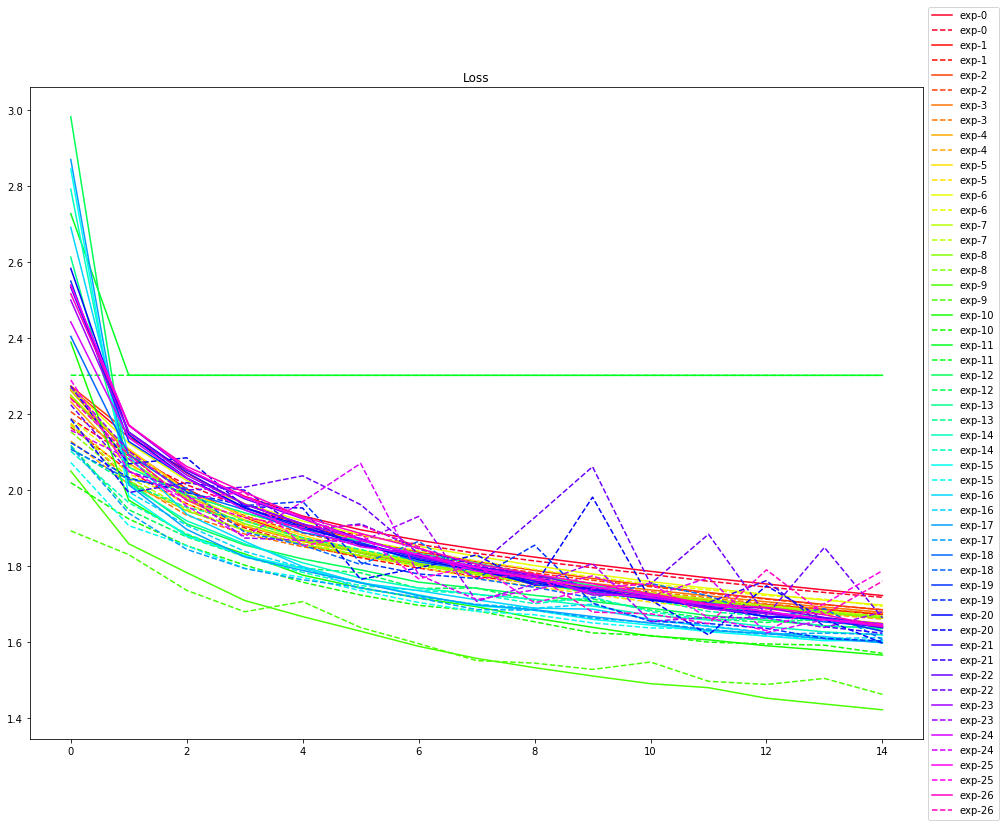

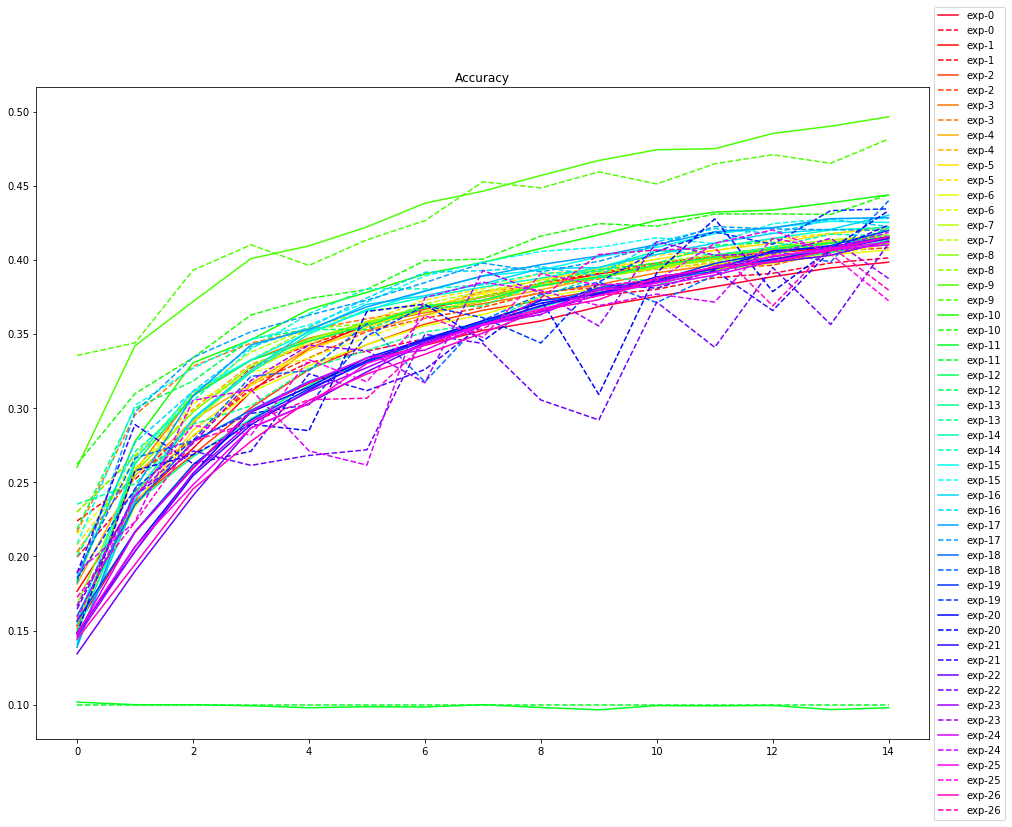

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()